In [1]:
from pyhgf import load_data
from pyhgf.model import Network
import matplotlib.pyplot as plt

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [2]:
timeserie = load_data("continuous")

In [3]:
unbounded = (
    Network()
    .add_nodes(precision=1e4)
    .add_nodes(precision=1e4, mean=timeserie[0], tonic_volatility=-13.0, value_children=0)
    .add_nodes(precision=1e1, tonic_volatility=-2.0, volatility_children=1)
    .add_nodes(precision=1e1, tonic_volatility=-2.0, volatility_children=2)
)

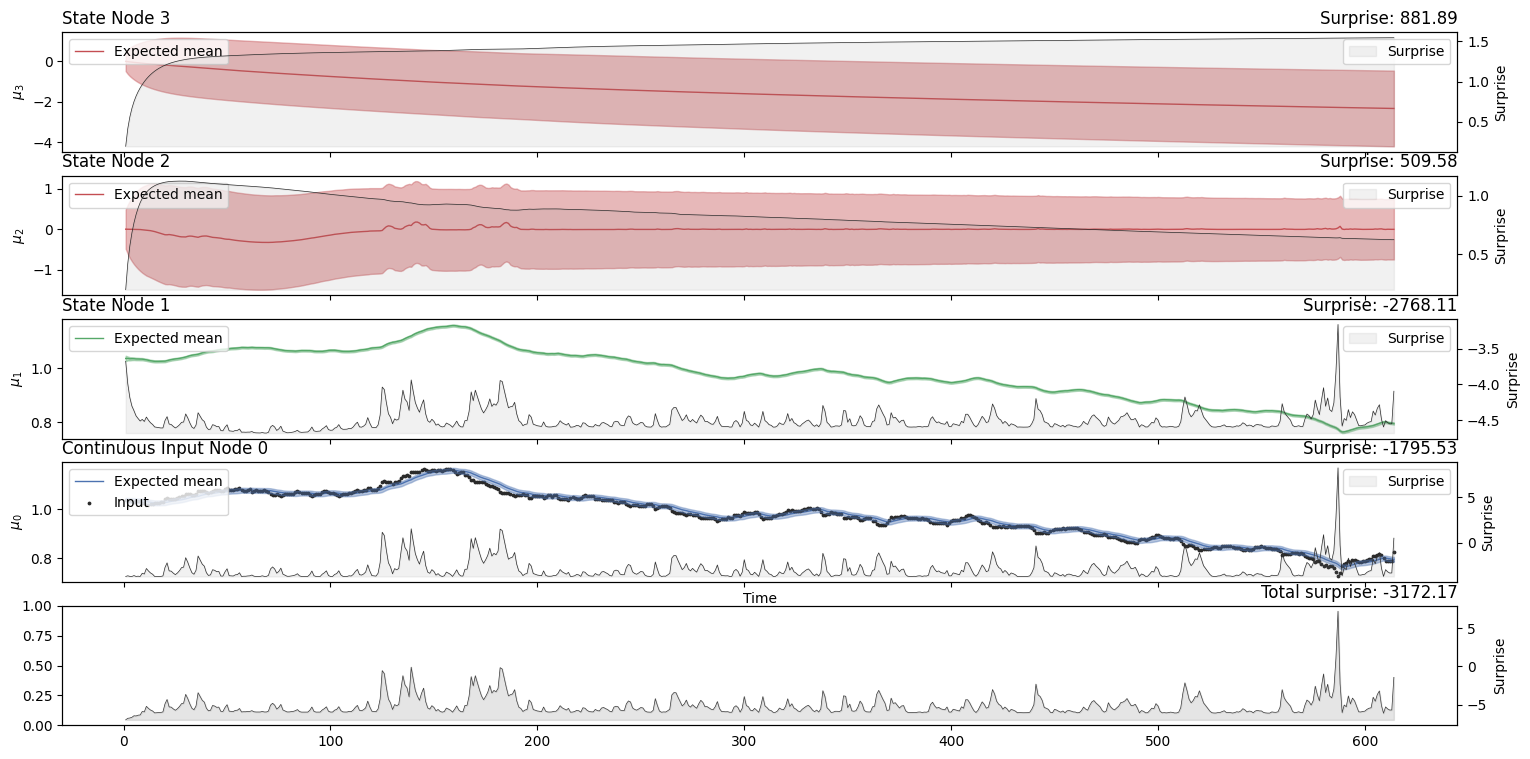

In [4]:
unbounded.input_data(input_data=timeserie).plot_trajectories(show_total_surprise=True);

In [5]:
ehgf = (
    Network(update_type="eHGF")
    .add_nodes(precision=1e4)
    .add_nodes(precision=1e4, mean=timeserie[0], tonic_volatility=-13.0, value_children=0)
    .add_nodes(precision=1e1, tonic_volatility=-2.0, volatility_children=1)
    .add_nodes(precision=1e1, tonic_volatility=-2.0, volatility_children=2)
)

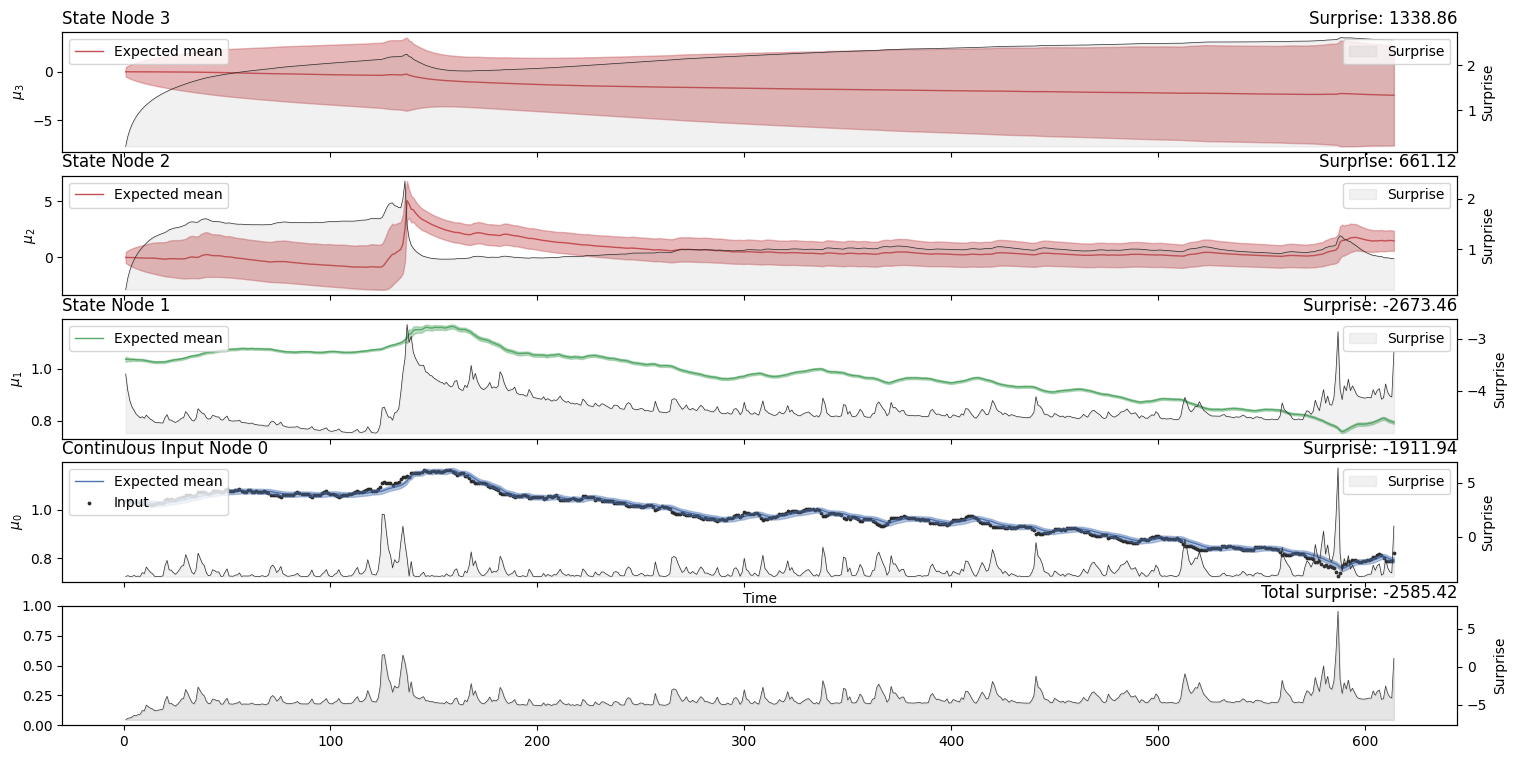

In [6]:
ehgf.input_data(input_data=timeserie).plot_trajectories(show_total_surprise=True);

In [7]:
standard = (
    Network(update_type="standard")
    .add_nodes(precision=1e4)
    .add_nodes(precision=1e4, mean=timeserie[0], tonic_volatility=-13.0, value_children=0)
    .add_nodes(precision=1e1, tonic_volatility=-2.0, volatility_children=1)
    .add_nodes(precision=1e1, tonic_volatility=-2.0, volatility_children=2)
)

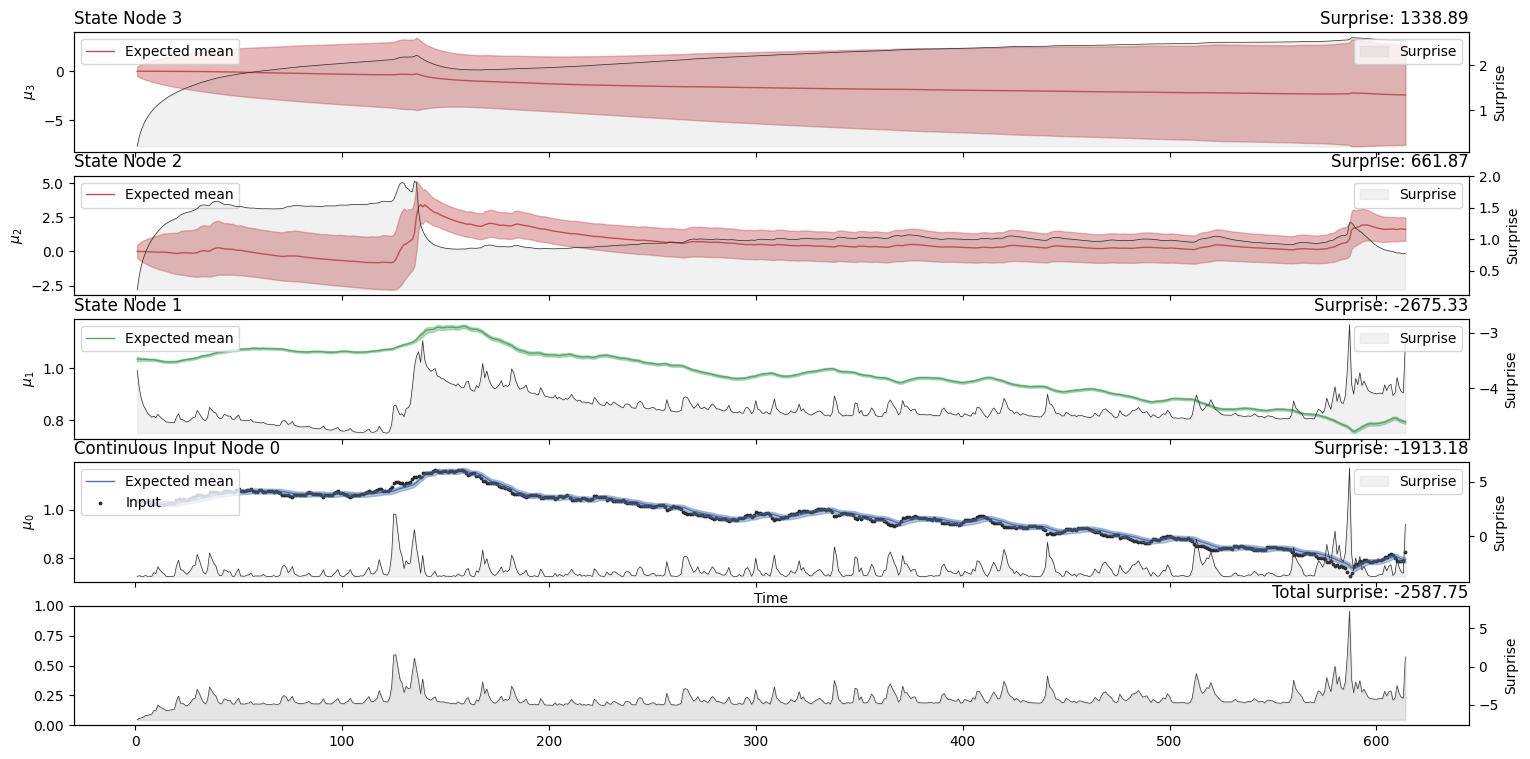

In [8]:
standard.input_data(input_data=timeserie).plot_trajectories(show_total_surprise=True);

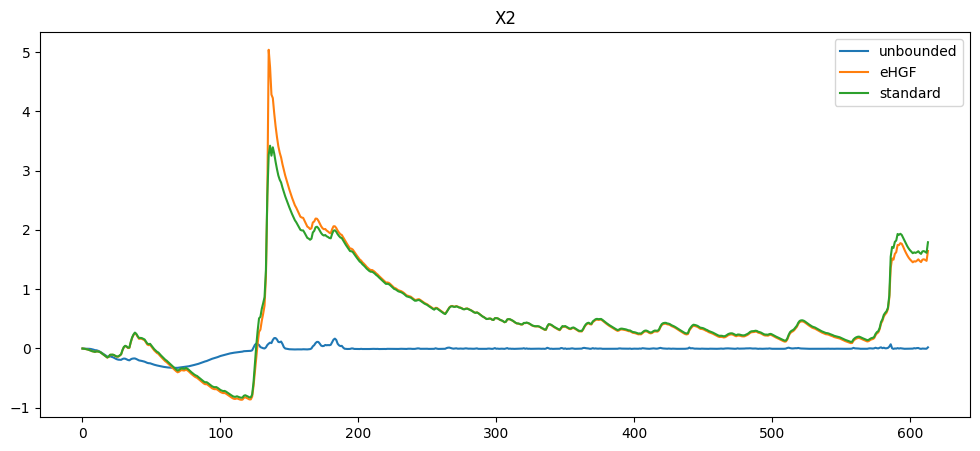

In [9]:
plt.figure(figsize=(12, 5))
plt.title("X2")
plt.plot(unbounded.node_trajectories[2]["mean"], label="unbounded")
plt.plot(ehgf.node_trajectories[2]["mean"], label="eHGF")
plt.plot(standard.node_trajectories[2]["mean"], label="standard")
plt.legend()

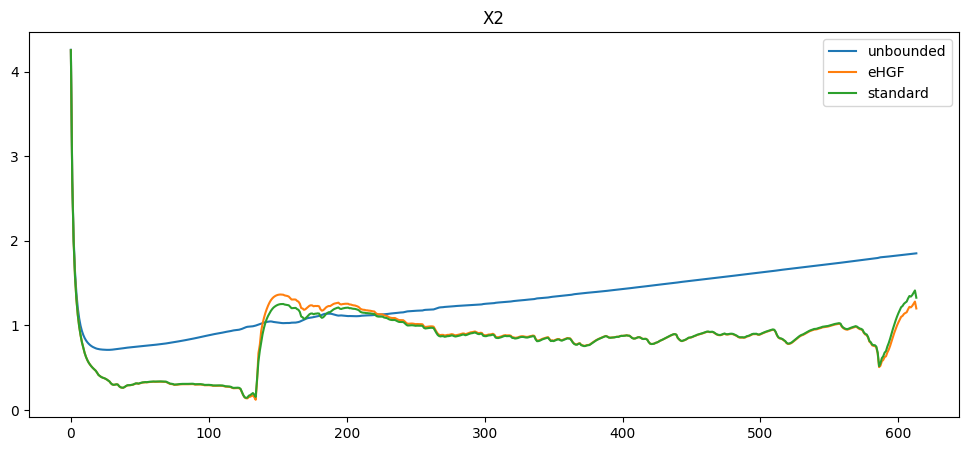

In [10]:
plt.figure(figsize=(12, 5))
plt.title("X2")
plt.plot(unbounded.node_trajectories[2]["precision"], label="unbounded")
plt.plot(ehgf.node_trajectories[2]["precision"], label="eHGF")
plt.plot(standard.node_trajectories[2]["precision"], label="standard")
plt.legend()

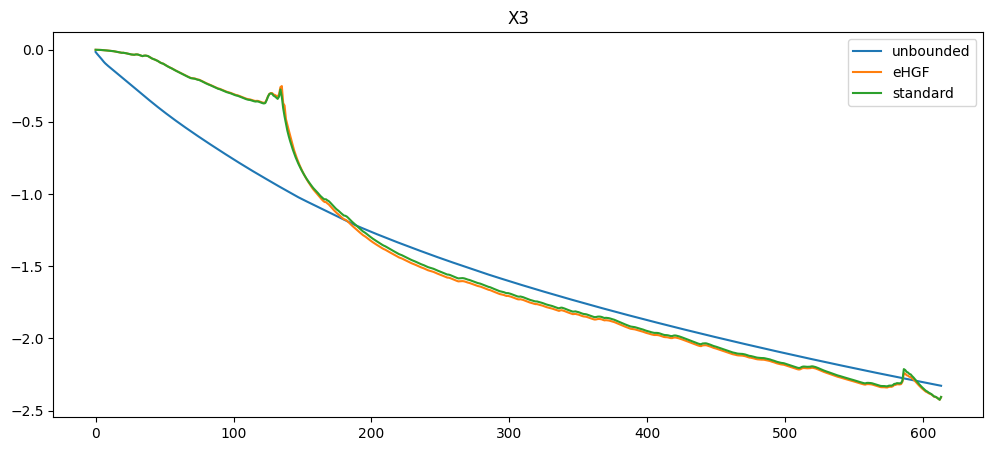

In [11]:
plt.figure(figsize=(12, 5))
plt.title("X3")
plt.plot(unbounded.node_trajectories[3]["mean"], label="unbounded")
plt.plot(ehgf.node_trajectories[3]["mean"], label="eHGF")
plt.plot(standard.node_trajectories[3]["mean"], label="standard")
plt.legend()

In [12]:
unbounded.to_pandas()[["x_2_mean", "x_2_precision"]].head(5)

,x_2_mean,x_2_precision
0,-0.001292,4.259687
1,-0.003051,2.735539
2,-0.004116,2.035269
3,-0.004226,1.636637
4,-0.004043,1.382097


In [13]:
ehgf.to_pandas()[["x_2_mean", "x_2_precision"]].head(5)

,x_2_mean,x_2_precision
0,-0.001315,4.254841
1,-0.003792,2.707180
2,-0.007876,1.990393
3,-0.013402,1.578491
4,-0.019213,1.311108


In [14]:
standard.to_pandas()[["x_2_mean", "x_2_precision"]].head(5)

,x_2_mean,x_2_precision
0,-0.001313,4.254841
1,-0.003784,2.707177
2,-0.007849,1.990388
3,-0.013339,1.578484
4,-0.019106,1.311100
